Failed to find token: KEY
┌───────────────────────────────┐
│ M Z Y E M Y S T E R Y G S S C │
│ I E I S E Z T K A K V A T O O │
│ S N M C X C C D E X Y M R L D │
│ S C M A I L O E S Y I E A V E │
│ I I E P C U U D U O N M T E S │
│ O R R E A E N U S R S A E C O │
│ N C S G N S T C P K A S G H O │
│ C U I A C E D T E E N T Y A U │
│ P R V M A C O I N N E E H L T │
│ U S E E R R W O S I A R I L B │
│ Z E L N T E N N E G S T D E R │
│ Z R O I E T F M Y M Y I D N E │
│ L O C G L S M I N A L M E G A │
│ E O K H T H E M E O U E N E K │
│ T M S T R I D D L E M R A U R │
└───────────────────────────────┘
┌───────────────────────────────┐
│     Y                         │
│           Z T K A K V         │
│                 E X Y         │
│                   Y           │
│                   O           │
│                   R         O │
│                   K           │
│ C                             │
│                               │
│                               │
│                     

(-0.04200000000000001, 1.036, 1.022, -0.05600000000000001)

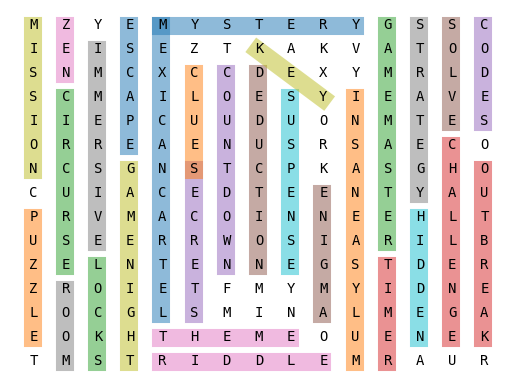

In [106]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "monospace"


input_text = """
MZYEMYSTERYGSSC
IEISEZTKAKVATOO
SNMCXCCDEXYMRLD
SCMAILOESYIEAVE
IIEPCUUDUONMTES
ORREAENUSRSAECO
NCSGNSTCPKASGHO
CUIACEDTEENTYAU
PRVMACOINNEEHLT
USEERRWOSIARILB
ZELNTENNEGSTDER
ZROIETFMYMYIDNE
LOCGLSMINALMEGA
EOKHTHEMEOUENEK
TMSTRIDDLEMRAUR
"""


# process input
MODE = "CROSSWORD"
crossword = []
tokens = [
    "Mexican Cartel",
    "Insane Asylum",
    "Game Master",
    "Key",
    "Challenge",
    "Countdown",
    "Deduction",
    "Zen",
    "Immersive",
    "Game Night",
    "Suspense",
    "Mystery",
    "Puzzle",
    "Circurse",
    "Outbreak",
    "Secrets",
    "Enigma",
    "Riddle",
    "Strategy",
    "Mission",
    "Hidden",
    "Escape",
    "Clues",
    "Locks",
    "Timer",
    "Codes",
    "Solve",
    "Theme",
    "Room",
]
for line in input_text.strip().split("\n"):
    crossword.append(list(line))

crossword = np.array(crossword)
LINE_LENGTH = len(crossword[0])

tokens = [token.replace(" ", "").upper() for token in tokens]


from dataclasses import dataclass


@dataclass
class Locator:
    row_start: int
    row_end: int  # non inclusive
    col_start: int
    col_end: int  # non inclusive

    def array(self):
        return np.array(
            [
                [self.col_start, self.col_end],
                [self.row_start, self.row_end],
            ]
        )


def draw_box(text):
    lines = text.splitlines()
    width = max(len(line) for line in lines)
    top_border = "┌" + "─" * (width + 2) + "┐"
    bottom_border = "└" + "─" * (width + 2) + "┘"
    body = "\n".join(f"│ {line.ljust(width)} │" for line in lines)
    return f"{top_border}\n{body}\n{bottom_border}"


def to_textblock(array, join_char=""):
    return "\n".join([join_char.join(row) for row in array])


def frame_textblock(textblock):
    lines = textblock.split("\n")
    # print('len(lines[0]))


def pretty_print_array(array):
    if array.dtype == bool:
        # convert to single character array
        text_bolck = (
            to_textblock(array.astype(int).astype(str), join_char=" ")
            .replace("0", " ")
            .replace("1", "#")
        )
    else:
        text_bolck = to_textblock(array, join_char=" ")
    print(draw_box(text_bolck))


BOOL_MASK = np.zeros(crossword.shape, dtype=bool)
# pretty_print_array(BOOL_MASK)


def locate_token(text_array, token):

    def _inner(_array):
        for i, line in enumerate(_array):
            res = re.search(token, "".join(line))
            if res is not None:
                return (i, res)

    # try current orientation:
    result = _inner(text_array)
    if result is not None:
        return Locator(result[0], result[0] + 1, result[1].start(), result[1].end())
    result = _inner(text_array.T)
    if result is not None:
        return Locator(result[1].start(), result[1].end(), result[0], result[0] + 1)
    if result is None:
        raise RuntimeError(f"Failed to find token: {token}")


def get_word_mask(locator: Locator):
    bool_mask = BOOL_MASK.copy()
    bool_mask[
        locator.row_start : locator.row_end, locator.col_start : locator.col_end
    ] = True
    return bool_mask


accumulate_boolmask = BOOL_MASK.copy()

all_locators = []
missing = []
for token in tokens:
    try:
        all_locators.append(locate_token(crossword, token))
    except RuntimeError as e:
        print(e)
        missing.append(token)
        pass


for locator in all_locators:
    accumulate_boolmask = accumulate_boolmask | get_word_mask(locator)

crossword_copy = crossword.copy()
crossword_copy[accumulate_boolmask] = " "
pretty_print_array(crossword)
pretty_print_array(crossword_copy)
print(f"==== ^ The above map does not accounts for {missing} ====")

# manually add KEY as it's diagonal
all_locators.append(Locator(1, 4, 7, 10))



canvas_multiplier = 0.07

for i in range(crossword.shape[0]):
    for j in range(crossword.shape[1]):
        w = crossword[j, i]
        coordinate = (i) * canvas_multiplier, (j) * canvas_multiplier
        plt.text(*coordinate, f"{w}")

for locator in all_locators:
    coor = locator.array().astype(float)
    coor[0, 1] -= 1  # compensate that original input last idx was non-inclusive
    coor[1, 1] -= 1  # compensate that original input last idx was non-inclusive
    coor[1, :] -= 0.1
    coor[0, :] += 0.1
    coor = coor * canvas_multiplier
    plt.plot(coor[0, :], coor[1, :], linewidth=13.0, alpha=0.5)

plt.xticks([])
plt.yticks([])

plt.gca().invert_yaxis()
plt.gca().axis("off")